In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

In [2]:
def do_prediction(X_train, Y_train, X_test, Y_test):
    clf = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.03, 
                    verbose=True)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    return classification_report(Y_test, Y_pred)

def get_tsne(X):
    X_embedded = TSNE(n_components = 2, learning_rate='auto', init='random').fit_transform(X)
    return X_embedded


def get_plot(X, Y):
    data_embedded_combined = pd.DataFrame(data=np.c_[X, Y], columns=['tsne-one-d', 'tsne-two-d'] + ['target'])
    sns.lmplot(data=data_embedded_combined, x='tsne-one-d', y='tsne-two-d', hue='target', fit_reg = False)
    plt.show()

In [3]:
data = pd.read_csv("../data/digits.csv")
# print(data.columns)
data.drop(['Unnamed: 0'], inplace= True, axis= 1)
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [4]:
np.unique(data['target'], return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [5]:
# labels = {'ad.': 1,'nonad.': 0}
  
# data['class'] = [labels[item] for item in data['class']]
# data

In [6]:
x = data.drop(['target'], axis = 1)
y = data['target']
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [8]:
print(do_prediction(X_train, Y_train, X_test, Y_test))

Iteration 1, loss = 2.35394094
Iteration 2, loss = 2.22873221
Iteration 3, loss = 2.14173916
Iteration 4, loss = 2.06343938
Iteration 5, loss = 1.97984047
Iteration 6, loss = 1.88956681
Iteration 7, loss = 1.80241276
Iteration 8, loss = 1.71803605
Iteration 9, loss = 1.63667256
Iteration 10, loss = 1.55825642
Iteration 11, loss = 1.48650718
Iteration 12, loss = 1.41272760
Iteration 13, loss = 1.34630016
Iteration 14, loss = 1.28364787
Iteration 15, loss = 1.22261510
Iteration 16, loss = 1.16796483
Iteration 17, loss = 1.11325222
Iteration 18, loss = 1.06359202
Iteration 19, loss = 1.01694701
Iteration 20, loss = 0.97919718
Iteration 21, loss = 0.94415936
Iteration 22, loss = 0.89910894
Iteration 23, loss = 0.86754921
Iteration 24, loss = 0.83515688
Iteration 25, loss = 0.81269557
Iteration 26, loss = 0.78506106
Iteration 27, loss = 0.75796719
Iteration 28, loss = 0.74480566
Iteration 29, loss = 0.71461143
Iteration 30, loss = 0.70176307
Iteration 31, loss = 0.67849848
Iteration 32, los

c:\Users\DELL\miniconda3\envs\rish_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
model = OneClassSVM(kernel = "rbf", gamma = "scale", nu = 0.001)
model.fit(X_train)
Y_train_pred = model.predict(X_train)

In [10]:
anomalies_index = np.where(Y_train_pred == -1)
anomalies_index

(array([  16,   66,  173,  194,  219,  297,  349,  448,  698,  779,  815,
         836,  857,  921,  924,  996, 1028, 1090, 1182, 1193, 1263, 1318,
        1340], dtype=int64),)

In [11]:
X_train_new = X_train.drop(X_train.index[anomalies_index])
Y_train_new = Y_train.drop(Y_train.index[anomalies_index])

In [12]:
X_train_new.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1414.0,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,...,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,0.0,0.294201,5.193069,11.877652,11.888260,5.765205,1.380481,0.120934,0.003536,1.961103,...,3.741867,0.198727,0.000707,0.277935,5.519095,12.161245,11.756011,6.685290,2.009194,0.327440
std,0.0,0.879753,4.721268,4.195154,4.220426,5.669729,3.337079,0.957083,0.070296,3.127041,...,4.939033,0.959608,0.026593,0.925296,5.064690,4.286885,4.926554,5.886215,4.000786,1.737028
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,9.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,9.750000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,14.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


<AxesSubplot:>

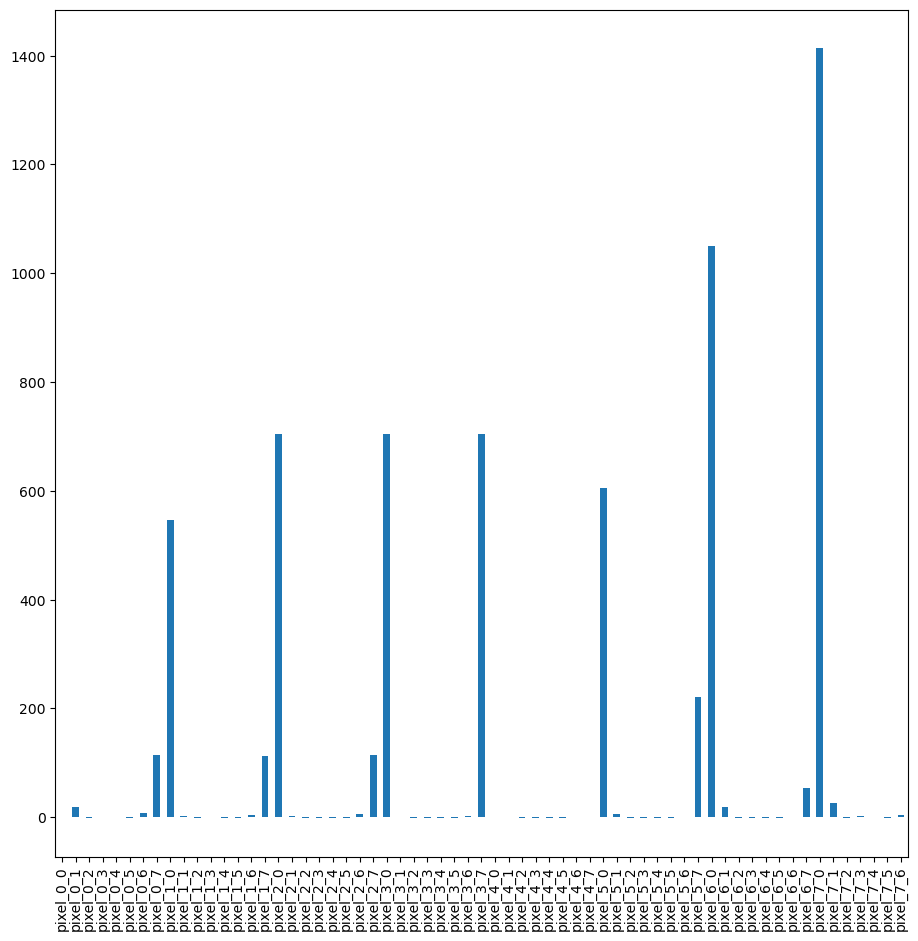

In [13]:
fig =plt.figure(figsize = (11,11))
X_train_new.iloc[:,:-1].kurtosis(axis=0).plot(kind='bar')

In [14]:
X_train_new.skew()

pixel_0_0    0.000000
pixel_0_1    3.999768
pixel_0_2    0.594267
pixel_0_3   -1.233392
pixel_0_4   -1.134874
               ...   
pixel_7_3   -1.371713
pixel_7_4   -1.180869
pixel_7_5    0.262211
pixel_7_6    2.211168
pixel_7_7    6.390036
Length: 64, dtype: float64

In [15]:
# X_data_embedded_new = get_tsne(X_train_new)
# get_plot(X_data_embedded_new, Y_train_new)

In [16]:
print(do_prediction(X_train_new, Y_train_new, X_test, Y_test))

Iteration 1, loss = 2.35178232
Iteration 2, loss = 2.23815090
Iteration 3, loss = 2.14296811
Iteration 4, loss = 2.06441421
Iteration 5, loss = 1.98299414
Iteration 6, loss = 1.90701946
Iteration 7, loss = 1.81257209
Iteration 8, loss = 1.73920003
Iteration 9, loss = 1.65330151
Iteration 10, loss = 1.56401504
Iteration 11, loss = 1.51274182
Iteration 12, loss = 1.42650471
Iteration 13, loss = 1.34669358
Iteration 14, loss = 1.28026405
Iteration 15, loss = 1.21565955
Iteration 16, loss = 1.16628428
Iteration 17, loss = 1.12074879
Iteration 18, loss = 1.05998825
Iteration 19, loss = 1.01380215
Iteration 20, loss = 0.98953767
Iteration 21, loss = 0.93993103
Iteration 22, loss = 0.92581192
Iteration 23, loss = 0.88346790
Iteration 24, loss = 0.85161320
Iteration 25, loss = 0.82214825
Iteration 26, loss = 0.78687909
Iteration 27, loss = 0.76381051
Iteration 28, loss = 0.73809313
Iteration 29, loss = 0.71869680
Iteration 30, loss = 0.70315038
Iteration 31, loss = 0.68406345
Iteration 32, los

In [17]:
# X_data_embedded = get_tsne(X_train)
# get_plot(X_data_embedded, Y_train)